<a href="https://colab.research.google.com/github/anikasrv/Basic.webt/blob/main/HateSpeechDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT THE PACKAGES

In [ ]:
 import pandas as pd
 import numpy as np
 import nltk
 import re
 import string
 import seaborn as sns
 import matplotlib.pyplot as plt


 from sklearn.feature_extraction.text import CountVectorizer
 from sklearn.model_selection import train_test_split
 from sklearn.tree import DecisionTreeClassifier
 from sklearn.svm import SVC
 from sklearn.naive_bayes import MultinomialNB


 from sklearn.metrics import confusion_matrix, classification_report
 from nltk.corpus import stopwords
 from nltk.stem.porter import PorterStemmer
 from sklearn.metrics import accuracy_score





IMPORT THE DATASET

In [ ]:
data=pd.read_csv("twitter.csv")
print(data.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  


Map the columns for  hate speech

In [ ]:
data["labels"]=data["class"].map({0:"Offensive language",1:"Hate Speech",2:"Normal"})
print(data.head(15))


    Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0            0      3            0                   0        3      2   
1            1      3            0                   3        0      1   
2            2      3            0                   3        0      1   
3            3      3            0                   2        1      1   
4            4      6            0                   6        0      1   
5            5      3            1                   2        0      1   
6            6      3            0                   3        0      1   
7            7      3            0                   3        0      1   
8            8      3            0                   3        0      1   
9            9      3            1                   2        0      1   
10          10      3            0                   3        0      1   
11          11      3            0                   3        0      1   
12          12      3            0    

In [ ]:
data=data[["tweet","labels"]]
print(data.head())


                                               tweet       labels
0  !!! RT @mayasolovely: As a woman you shouldn't...       Normal
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  Hate Speech
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  Hate Speech
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  Hate Speech
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  Hate Speech


Clean the sentance in the dataset

In [ ]:
def clean(text):
  stopword = set(stopwords.words('english'))  # Load stopwords
  stemmer = PorterStemmer()  # Initialize the stemmer
  text=str(text).lower()
  text=re.sub('\[.*?\]','',text)
  # it will remove the text inside square brackets
  text=re.sub('https?://\S+|www\.\S+','',text)
  # it will remove the urls
  text=re.sub('<.*?>+','',text)
  # it will remove the html tags
  text=re.sub('[%s]' % re.escape(string.punctuation),'', text)
  # remove punctuation like !, #, .
  text=re.sub('\n','', text)
  # remove words containing numbers
  text=re.sub('\w*\d\w*','', text)
  #remove words with numbers
  text=[word for word in text.split(' ') if word not in stopword]
  #remove stopwords
  # output will be like ["hellow", "world", "check", "test","tweet","hastags"]
  text=" ".join(text)


  text=[stemmer.stem(word) for word in text.split(' ')]
  text=" ".join(text)
  return text

  data["tweet"]=data["tweet"].apply(clean)
  # "hello world check test tweet hashtag tag"




Train the dataset using decision tree clasifier


In [ ]:
x = np.array(data["tweet"])
y = np.array(data["labels"])
cv = CountVectorizer()
X = cv.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


DecisionTreeClassifier()

In [ ]:
# Decision Tree Predictions
y_pred_tree = clf.predict(X_test)

# Add the Decision Tree classification report here
print("\nDecision Tree Classifier Report:\n")
print(classification_report(y_test, y_pred_tree))


Decision Tree Classifier Report:

                    precision    recall  f1-score   support

       Hate Speech       0.93      0.94      0.94      6335
            Normal       0.85      0.87      0.86      1379
Offensive language       0.35      0.26      0.30       465

          accuracy                           0.89      8179
         macro avg       0.71      0.69      0.70      8179
      weighted avg       0.88      0.89      0.89      8179



# 2.SUPPORT VECTOR MACHINE (SVM)



In [ ]:
svm = SVC(kernel='linear')  # Linear kernel for text data
svm.fit(X_train, y_train)

SVC(kernel='linear')

# Evaluate SVM



In [ ]:
y_pred_svm = svm.predict(X_test)
print("\nSVM Classifier Report:\n")
print(classification_report(y_test, y_pred_svm))


SVM Classifier Report:

                    precision    recall  f1-score   support

       Hate Speech       0.93      0.94      0.94      6335
            Normal       0.84      0.86      0.85      1379
Offensive language       0.42      0.31      0.36       465

          accuracy                           0.89      8179
         macro avg       0.73      0.70      0.72      8179
      weighted avg       0.89      0.89      0.89      8179



# 3. NAIVE BAYES CLASSIFIER


In [ ]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

# Evaluate Naive Bayes

In [ ]:
y_pred_nb = nb.predict(X_test)
print("\nNaive Bayes Classifier Report:\n")
print(classification_report(y_test, y_pred_nb))



Naive Bayes Classifier Report:

                    precision    recall  f1-score   support

       Hate Speech       0.86      0.98      0.92      6335
            Normal       0.85      0.56      0.68      1379
Offensive language       0.30      0.05      0.09       465

          accuracy                           0.86      8179
         macro avg       0.67      0.53      0.56      8179
      weighted avg       0.83      0.86      0.83      8179



# CONFUSION MATRIX FOR ALL MODELS


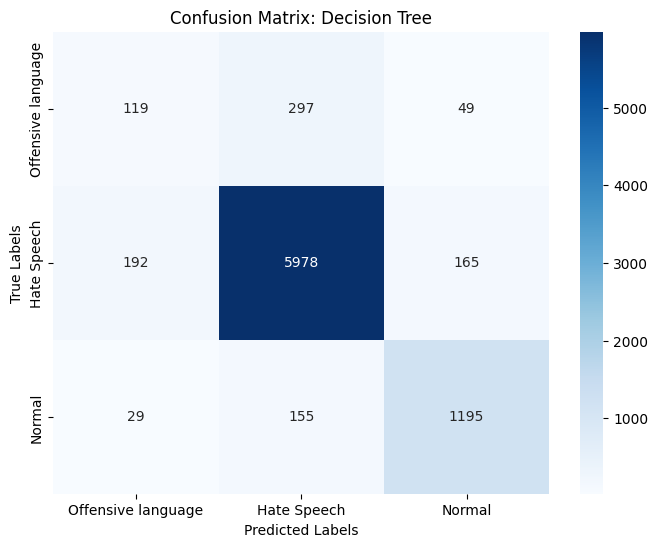

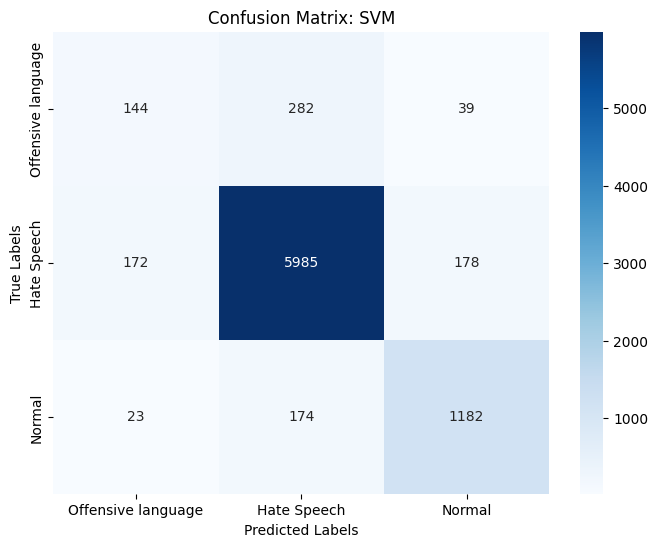

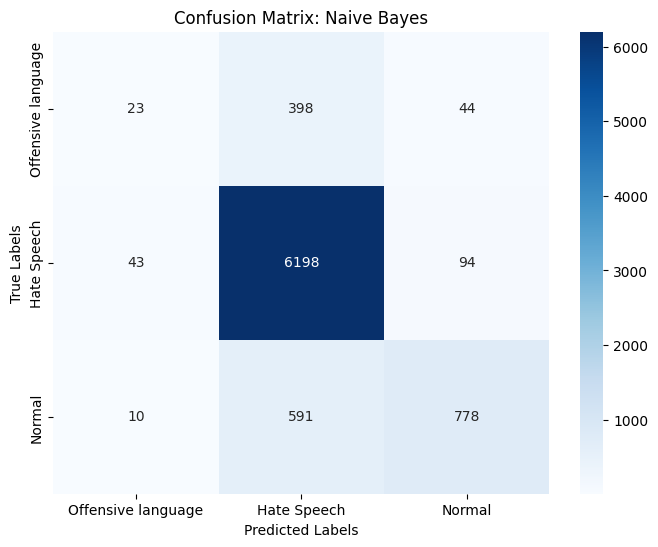

Classification Report:



In [ ]:
# Decision Tree Predictions
y_pred_tree = clf.predict(X_test)

# SVM Predictions
y_pred_svm = svm.predict(X_test)

# Naive Bayes Predictions
y_pred_nb = nb.predict(X_test)

models = {'Decision Tree': y_pred_tree, 'SVM': y_pred_svm, 'Naive Bayes': y_pred_nb}

for model_name, predictions in models.items():
    cm = confusion_matrix(y_test, predictions, labels=["Offensive language", "Hate Speech", "Normal"])
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Offensive language", "Hate Speech", "Normal"],
                yticklabels=["Offensive language", "Hate Speech", "Normal"])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.show()

    # plt.figure(figsize=(8, 1))  # Adjust the figure height for spacing
    # plt.axis('off')  # Turn off the axis
    # plt.show()

# Print classification report
print("Classification Report:\n")


Validate the dataset

In [ ]:
# VALIDATE THE DATASET WITH A SAMPLE
sample = "nonsense"
sample_transformed = cv.transform([sample]).toarray()

print("\nPredictions for the sample sentence:")
print(f"Decision Tree: {clf.predict(sample_transformed)}")
print(f"SVM: {svm.predict(sample_transformed)}")
print(f"Naive Bayes: {nb.predict(sample_transformed)}")



Predictions for the sample sentence:
Decision Tree: ['Normal']
SVM: ['Normal']
Naive Bayes: ['Hate Speech']
